In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [11]:
import pandas_profiling
import ydata_profiling

In [12]:
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
cars = pd.read_csv('E:\Project\Car Sales Project\Car_sales.csv')

In [14]:
cars

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [16]:
cars.isnull().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [20]:
report2 = ydata_profiling.ProfileReport(cars)

In [22]:
report2.to_file(output_file = 'profilereport.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
cars_contvar = cars.loc[:, (cars.dtypes == 'float64') | (cars.dtypes == 'int64')]
cars_catvar = cars.loc[:, (cars.dtypes == 'object')]

In [26]:
cars_contvar.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [27]:
cars_catvar.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [28]:
cars_contvar = cars_contvar.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [33]:
cars_contvar.Sales_in_thousands.min()

0.93728

In [32]:
cars.Sales_in_thousands.min()

0.11

In [38]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [40]:
cars_contvar = cars_contvar.apply(missing_imputation)
cars_catvar = cars_catvar.apply(missing_imputation)

In [41]:
cars_contvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  157 non-null    float64
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Width                   157 non-null    float64
 7   Length                  157 non-null    float64
 8   Curb_weight             157 non-null    float64
 9   Fuel_capacity           157 non-null    float64
 10  Fuel_efficiency         157 non-null    float64
 11  Power_perf_factor       157 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


In [42]:
cars_catvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Manufacturer   157 non-null    object
 1   Model          157 non-null    object
 2   Vehicle_type   157 non-null    object
 3   Latest_Launch  157 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [44]:
Veh_type = pd.get_dummies(cars_catvar.Vehicle_type, prefix = cars_catvar.Vehicle_type.name)

In [45]:
Veh_type

,Vehicle_type_Car,Vehicle_type_Passenger
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
152,0,1
153,0,1
154,0,1
155,0,1


In [46]:
cars_new = pd.concat([cars_contvar,Veh_type], axis = 1)

In [47]:
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,0,1
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,0,1
2,14.114,18.225000,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.849583,0,1
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,0,1
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,0,1
153,15.245,18.020008,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,0,1
154,17.531,18.020008,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,0,1
155,3.493,18.020008,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,0,1


<AxesSubplot:>

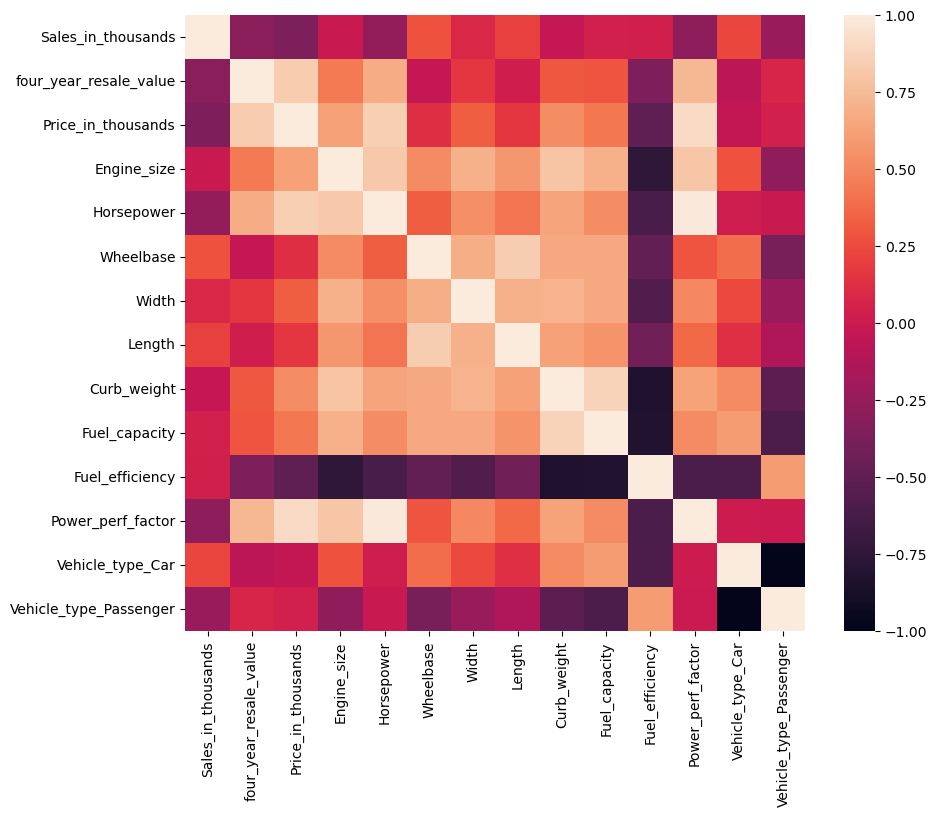

In [48]:
plt.figure(figsize = (10, 8))
sns.heatmap(cars_new.corr())

In [49]:
cars_new.drop(['Length', 'Width'], axis = 1, inplace = True)

In [51]:
cars_new['ln_sales_in_thousands'] = np.log(cars_new['Sales_in_thousands'])

In [52]:
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger,ln_sales_in_thousands
0,16.919,16.360000,21.500000,1.8,140.0,101.2,2.639,13.2,28.0,58.280150,0,1,2.828437
1,39.384,19.875000,28.400000,3.2,225.0,108.1,3.517,17.2,25.0,91.370778,0,1,3.673360
2,14.114,18.225000,27.328745,3.2,225.0,106.9,3.470,17.2,26.0,76.849583,0,1,2.647167
3,8.588,29.725000,42.000000,3.5,210.0,114.6,3.850,18.0,22.0,91.389779,0,1,2.150366
4,20.397,22.255000,23.990000,1.8,150.0,102.6,2.998,16.4,27.0,62.777639,0,1,3.015388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,1.9,160.0,100.5,3.042,15.8,25.0,66.498812,0,1,1.265538
153,15.245,18.020008,27.500000,2.4,168.0,104.9,3.208,17.9,25.0,70.654495,0,1,2.724252
154,17.531,18.020008,28.800000,2.4,168.0,104.9,3.259,17.9,25.0,71.155978,0,1,2.863971
155,3.493,18.020008,45.500000,2.3,236.0,104.9,3.601,18.5,23.0,101.623357,0,1,1.250761


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
feature_columns = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])

In [75]:
train_X, test_X, train_y, test_y = train_test_split(cars_new[feature_columns], 
                                            cars_new['ln_sales_in_thousands'], test_size = 0.3, 
                                                    random_state = 12345)

In [76]:
train, test = train_test_split(cars_new, test_size = 0.3, random_state = 12345)

In [77]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  157 non-null    float64
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Curb_weight             157 non-null    float64
 7   Fuel_capacity           157 non-null    float64
 8   Fuel_efficiency         157 non-null    float64
 9   Power_perf_factor       157 non-null    float64
 10  Vehicle_type_Car        157 non-null    uint8  
 11  Vehicle_type_Passenger  157 non-null    uint8  
 12  ln_sales_in_thousands   157 non-null    float64
dtypes: float64(11), uint8(2)
memory usage: 13.9 KB


In [79]:
lm1 = smf.ols('''ln_sales_in_thousands ~  Fuel_efficiency  + 
                     Horsepower + Price_in_thousands + Vehicle_type_Car +
                        Vehicle_type_Passenger + Wheelbase''', train).fit()

In [80]:
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.451
Model:                               OLS   Adj. R-squared:                  0.425
Method:                    Least Squares   F-statistic:                     16.93
Date:                   Fri, 10 Feb 2023   Prob (F-statistic):           3.45e-12
Time:                           17:32:50   Log-Likelihood:                -147.82
No. Observations:                    109   AIC:                             307.6
Df Residuals:                        103   BIC:                             323.8
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [81]:
train['pred_sales'] = np.exp(lm1.predict(train))

In [82]:
train[['Sales_in_thousands', 'pred_sales']]

,Sales_in_thousands,pred_sales
54,125.33800,33.656799
52,260.64532,32.734314
141,65.11900,83.295132
8,9.23100,15.535848
131,5.22300,51.524406
...,...,...
34,30.69600,32.294031
101,42.64300,41.591445
126,1.86600,0.959243
129,80.62000,70.081389


In [84]:
test['pred_sales'] = np.exp(lm1.predict(test))

In [86]:
train['Deciles'] = pd.qcut(train['pred_sales'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_sales'], 10, labels = False)

In [87]:
Predicted_avg = train.groupby('Deciles')[['Sales_in_thousands', 'pred_sales']].mean().reset_index()

In [88]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_sales']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = train[['Deciles', 'Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_sales']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = test[['Deciles', 'Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [89]:
Decile_analysis_train

,Deciles,pred_sales,Sales_in_thousands
0,9,109.747617,95.524636
1,8,53.219884,80.528636
2,7,44.290802,59.949455
3,6,37.887644,76.125909
4,5,32.601236,99.107232
5,4,28.271690,40.582909
6,3,22.423768,27.998909
7,2,17.984571,17.287091
8,1,13.056936,14.508273
9,0,5.880302,6.991571


In [90]:
Decile_analysis_test

,Deciles,pred_sales,Sales_in_thousands
0,9,109.034690,124.193264
1,8,48.471725,45.230600
2,7,37.360494,52.870400
3,6,33.729512,66.113250
4,5,31.309590,53.710400
5,4,24.822035,59.343600
6,3,21.227267,66.148500
7,2,16.901897,23.258000
8,1,13.473763,14.487600
9,0,3.295416,5.093856
